# Nanonets OCR Package

- This package is an optical character recognition (OCR) tool for python.
- It reads plain text and tables from image & PDF files using an OCR engine and provides intelligent post-processing options to ensure you get OCR results in formats you want.

Let's get started.

### Download the package using pip

`pip install ocr-nanonets-wrapper`

### Import
You can start by importing the package in a .py file or a .ipynb notebook

In [2]:
!pip install ocr-nanonets-wrapper



  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ocr-nanonets-wrapper: filename=ocr_nanonets_wrapper-1.1-py3-none-any.whl size=4703 sha256=49db87aa242c164060c0fa7a72853c61a9e3ab866a26352466b7dca340c6b321
  Stored in directory: /root/.cache/pip/wheels/79/0a/3a/943b1a7a11b4a43520e5cc2e56e4e95702d8c865c1f4befc6f
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40702 sha256=63620d7f9e9edd3ed2810e9483eb529c023f55730441562d4c552a89a287caba
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built ocr-nanonets-wrapper fpdf


In [3]:
from nanonets import NANONETSOCR
model = NANONETSOCR()

### Authenticate
- This software is perpetually free :)
- You can get your free API key (with unlimited requests) by creating a free account on [https://app.nanonets.com/#/keys](https://app.nanonets.com/#/keys?utm_source=wrapper)

In [4]:
model.set_token('0b48bf3d-1b5c-11ef-86d1-6a88a614f90f')

### PDF / Image to String
Let's read below image. There are three formatting options as shown below.

In [6]:
from IPython.display import Image


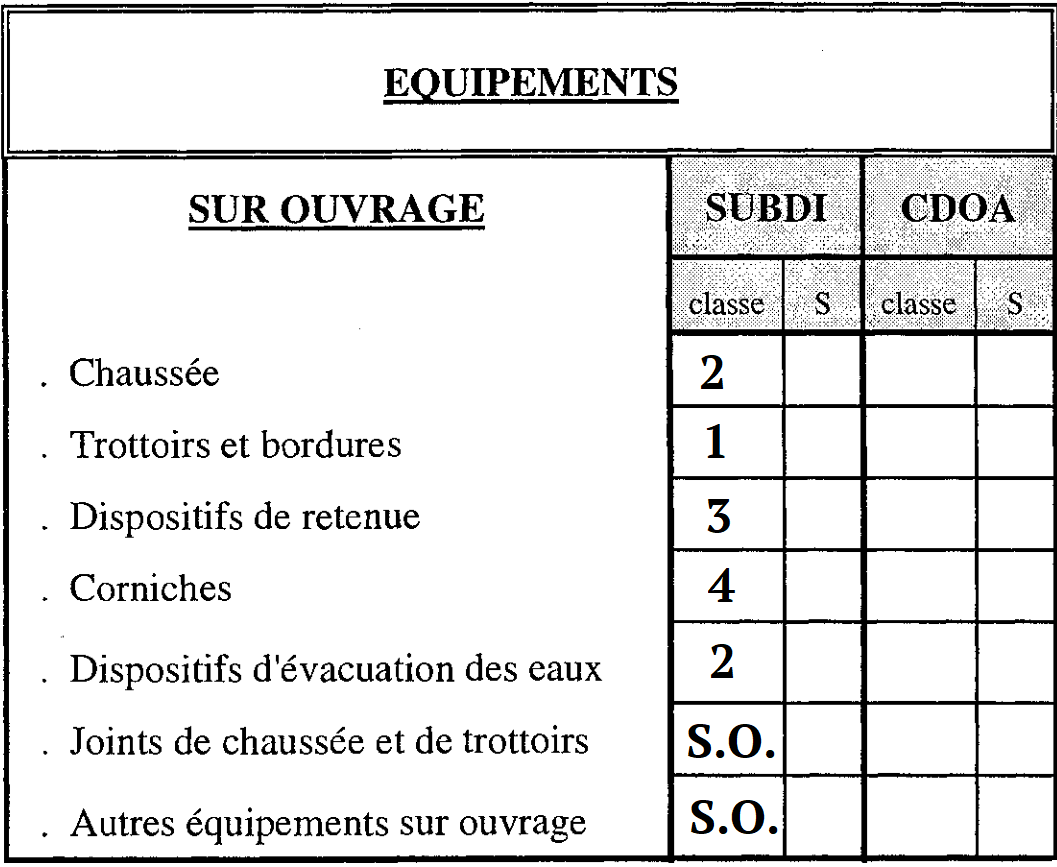

In [7]:
Image('TEST.png')

In [ ]:
string2 = model.convert_to_string('test.png', formatting='lines')
print(string2)

Test PDF Document
Let's use the OCR package to read it
Karan


In [ ]:
string3 = model.convert_to_string('test.png', formatting='none')
print(string3)

Test PDF Document Let's use the OCR package to read it Karan 


### PDF / Image to TXT
Let's read the same image.
- We have the same three formatting options as above.
- This reads the input and stores a .txt file.

In [ ]:
model.convert_to_txt('test.png', output_file_name='output.txt')

In [ ]:
model.convert_to_txt('test.png', formatting='lines', output_file_name='output.txt')

In [ ]:
model.convert_to_txt('test.png', formatting='none', output_file_name='output.txt')

### PDF / Image to Boxes
- each element contains predicted word and bounding box information
- bounding box information denotes the spatial position of each word in the file

In [ ]:
boxes = model.convert_to_boxes('test.png')
for box in boxes:
    print(box)

{'text': 'Test', 'xmin': 361, 'ymin': 112, 'xmax': 455, 'ymax': 146}
{'text': 'PDF', 'xmin': 478, 'ymin': 112, 'xmax': 563, 'ymax': 146}
{'text': 'Document', 'xmin': 587, 'ymin': 112, 'xmax': 812, 'ymax': 146}
{'text': "Let's", 'xmin': 159, 'ymin': 223, 'xmax': 258, 'ymax': 257}
{'text': 'use', 'xmin': 281, 'ymin': 231, 'xmax': 359, 'ymax': 257}
{'text': 'the', 'xmin': 381, 'ymin': 223, 'xmax': 452, 'ymax': 257}
{'text': 'OCR', 'xmin': 476, 'ymin': 222, 'xmax': 571, 'ymax': 257}
{'text': 'package', 'xmin': 595, 'ymin': 223, 'xmax': 780, 'ymax': 265}
{'text': 'to', 'xmin': 802, 'ymin': 225, 'xmax': 845, 'ymax': 257}
{'text': 'read', 'xmin': 870, 'ymin': 223, 'xmax': 964, 'ymax': 257}
{'text': 'it', 'xmin': 988, 'ymin': 221, 'xmax': 1015, 'ymax': 257}
{'text': 'Karan', 'xmin': 1164, 'ymin': 333, 'xmax': 1287, 'ymax': 367}


### PDF / Image to CSV
This method extracts tables from your file and prints them in a .csv file.

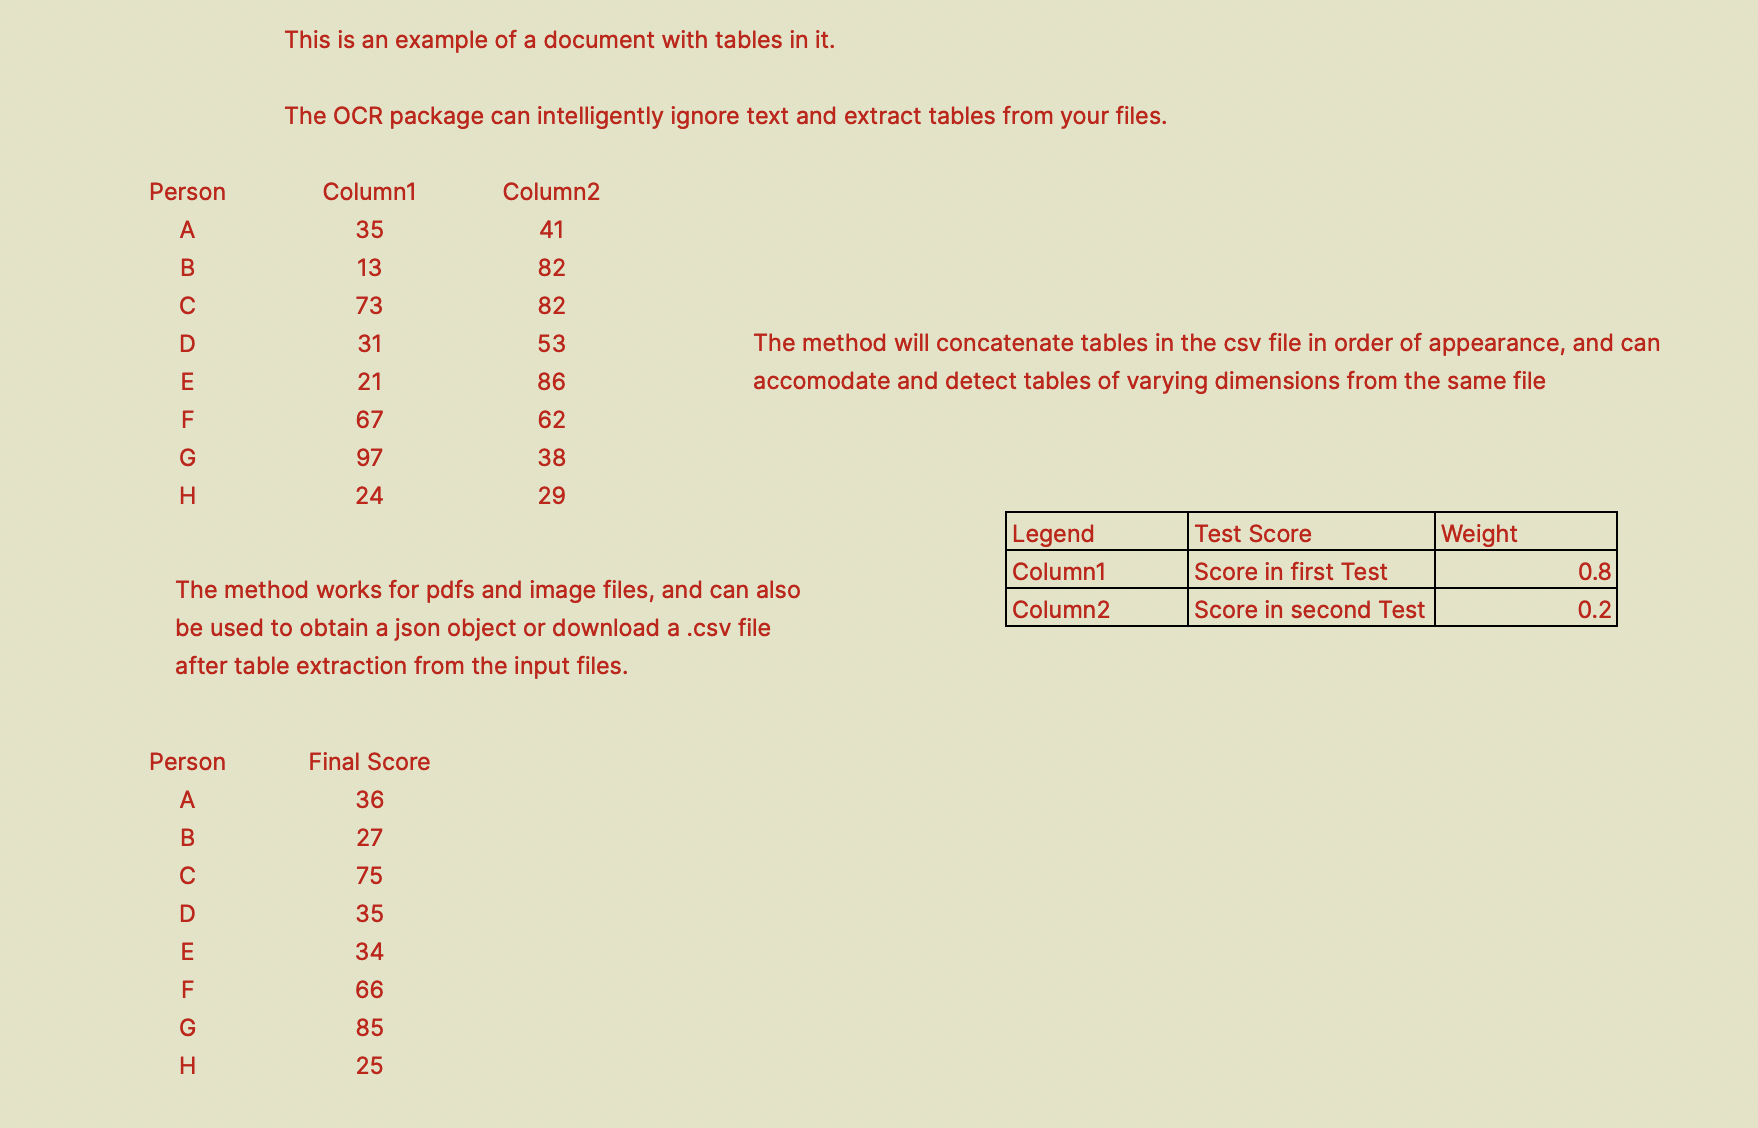

In [ ]:
Image('table.png')

In [9]:
model.convert_to_csv('TEST.png', output_file_name='output.csv')

- Let us open the csv file and take a look at it.
- I am attaching a screenshot of the output.csv generated here

### PDF / Image to Tables
This method extracts tables from your file and returns a json object.

In [ ]:
tables_json = model.convert_to_tables('table2.png')

Let us take a look at the output

In [ ]:
tables_json

[{'message': 'Success',
  'input': 'table2.png',
  'prediction': [{'id': '7088964c-52fd-48a6-b4a5-b222062a664b',
    'label': 'table',
    'xmin': 26,
    'ymin': 19,
    'xmax': 726,
    'ymax': 151,
    'score': 1,
    'ocr_text': 'table',
    'type': 'table',
    'cells': [{'id': '89b116a6-b9c0-483f-819d-4029b4f6a7c7',
      'row': 1,
      'col': 1,
      'row_span': 1,
      'col_span': 1,
      'label': '',
      'xmin': 26,
      'ymin': 19,
      'xmax': 234,
      'ymax': 63,
      'score': 0.90866643,
      'text': 'Legend',
      'row_label': '',
      'verification_status': 'correctly_predicted',
      'status': '',
      'failed_validation': '',
      'label_id': ''},
     {'id': 'fa8f4037-21cf-4e76-b352-735199c47694',
      'row': 1,
      'col': 2,
      'row_span': 1,
      'col_span': 1,
      'label': '',
      'xmin': 234,
      'ymin': 19,
      'xmax': 517,
      'ymax': 63,
      'score': 0.9236196,
      'text': 'Test Score',
      'row_label': '',
      'verific

### PDF / Image to Searchable PDF
You can directly convert your PDF or image file to a searchable PDF using the below code snippet. This will create a .pdf file as output. You will be able to search and detect all the text present in this output .pdf file.

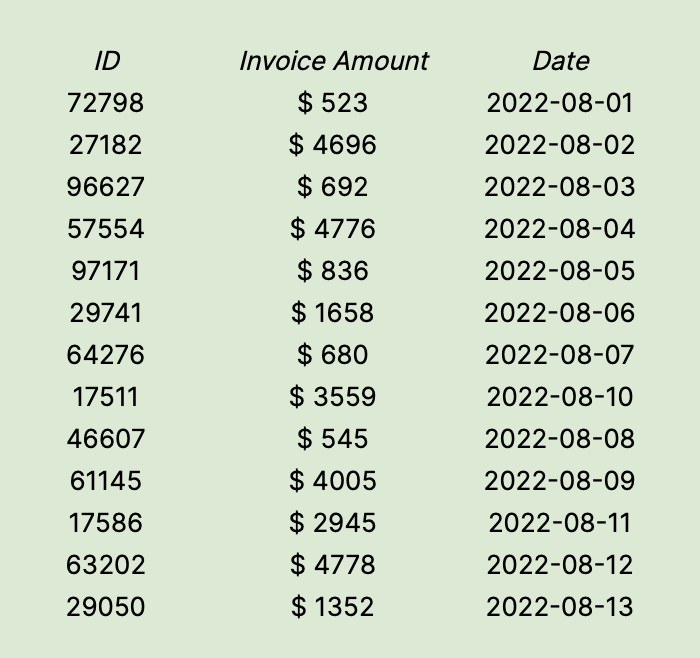

In [ ]:
Image('test2.png')

In [ ]:
model.convert_to_searchable_pdf('test2.png', output_file_name='output.pdf')

- The output.pdf created is now text searchable
- I am attaching a screenshot of me trying to search for "175" in the document.

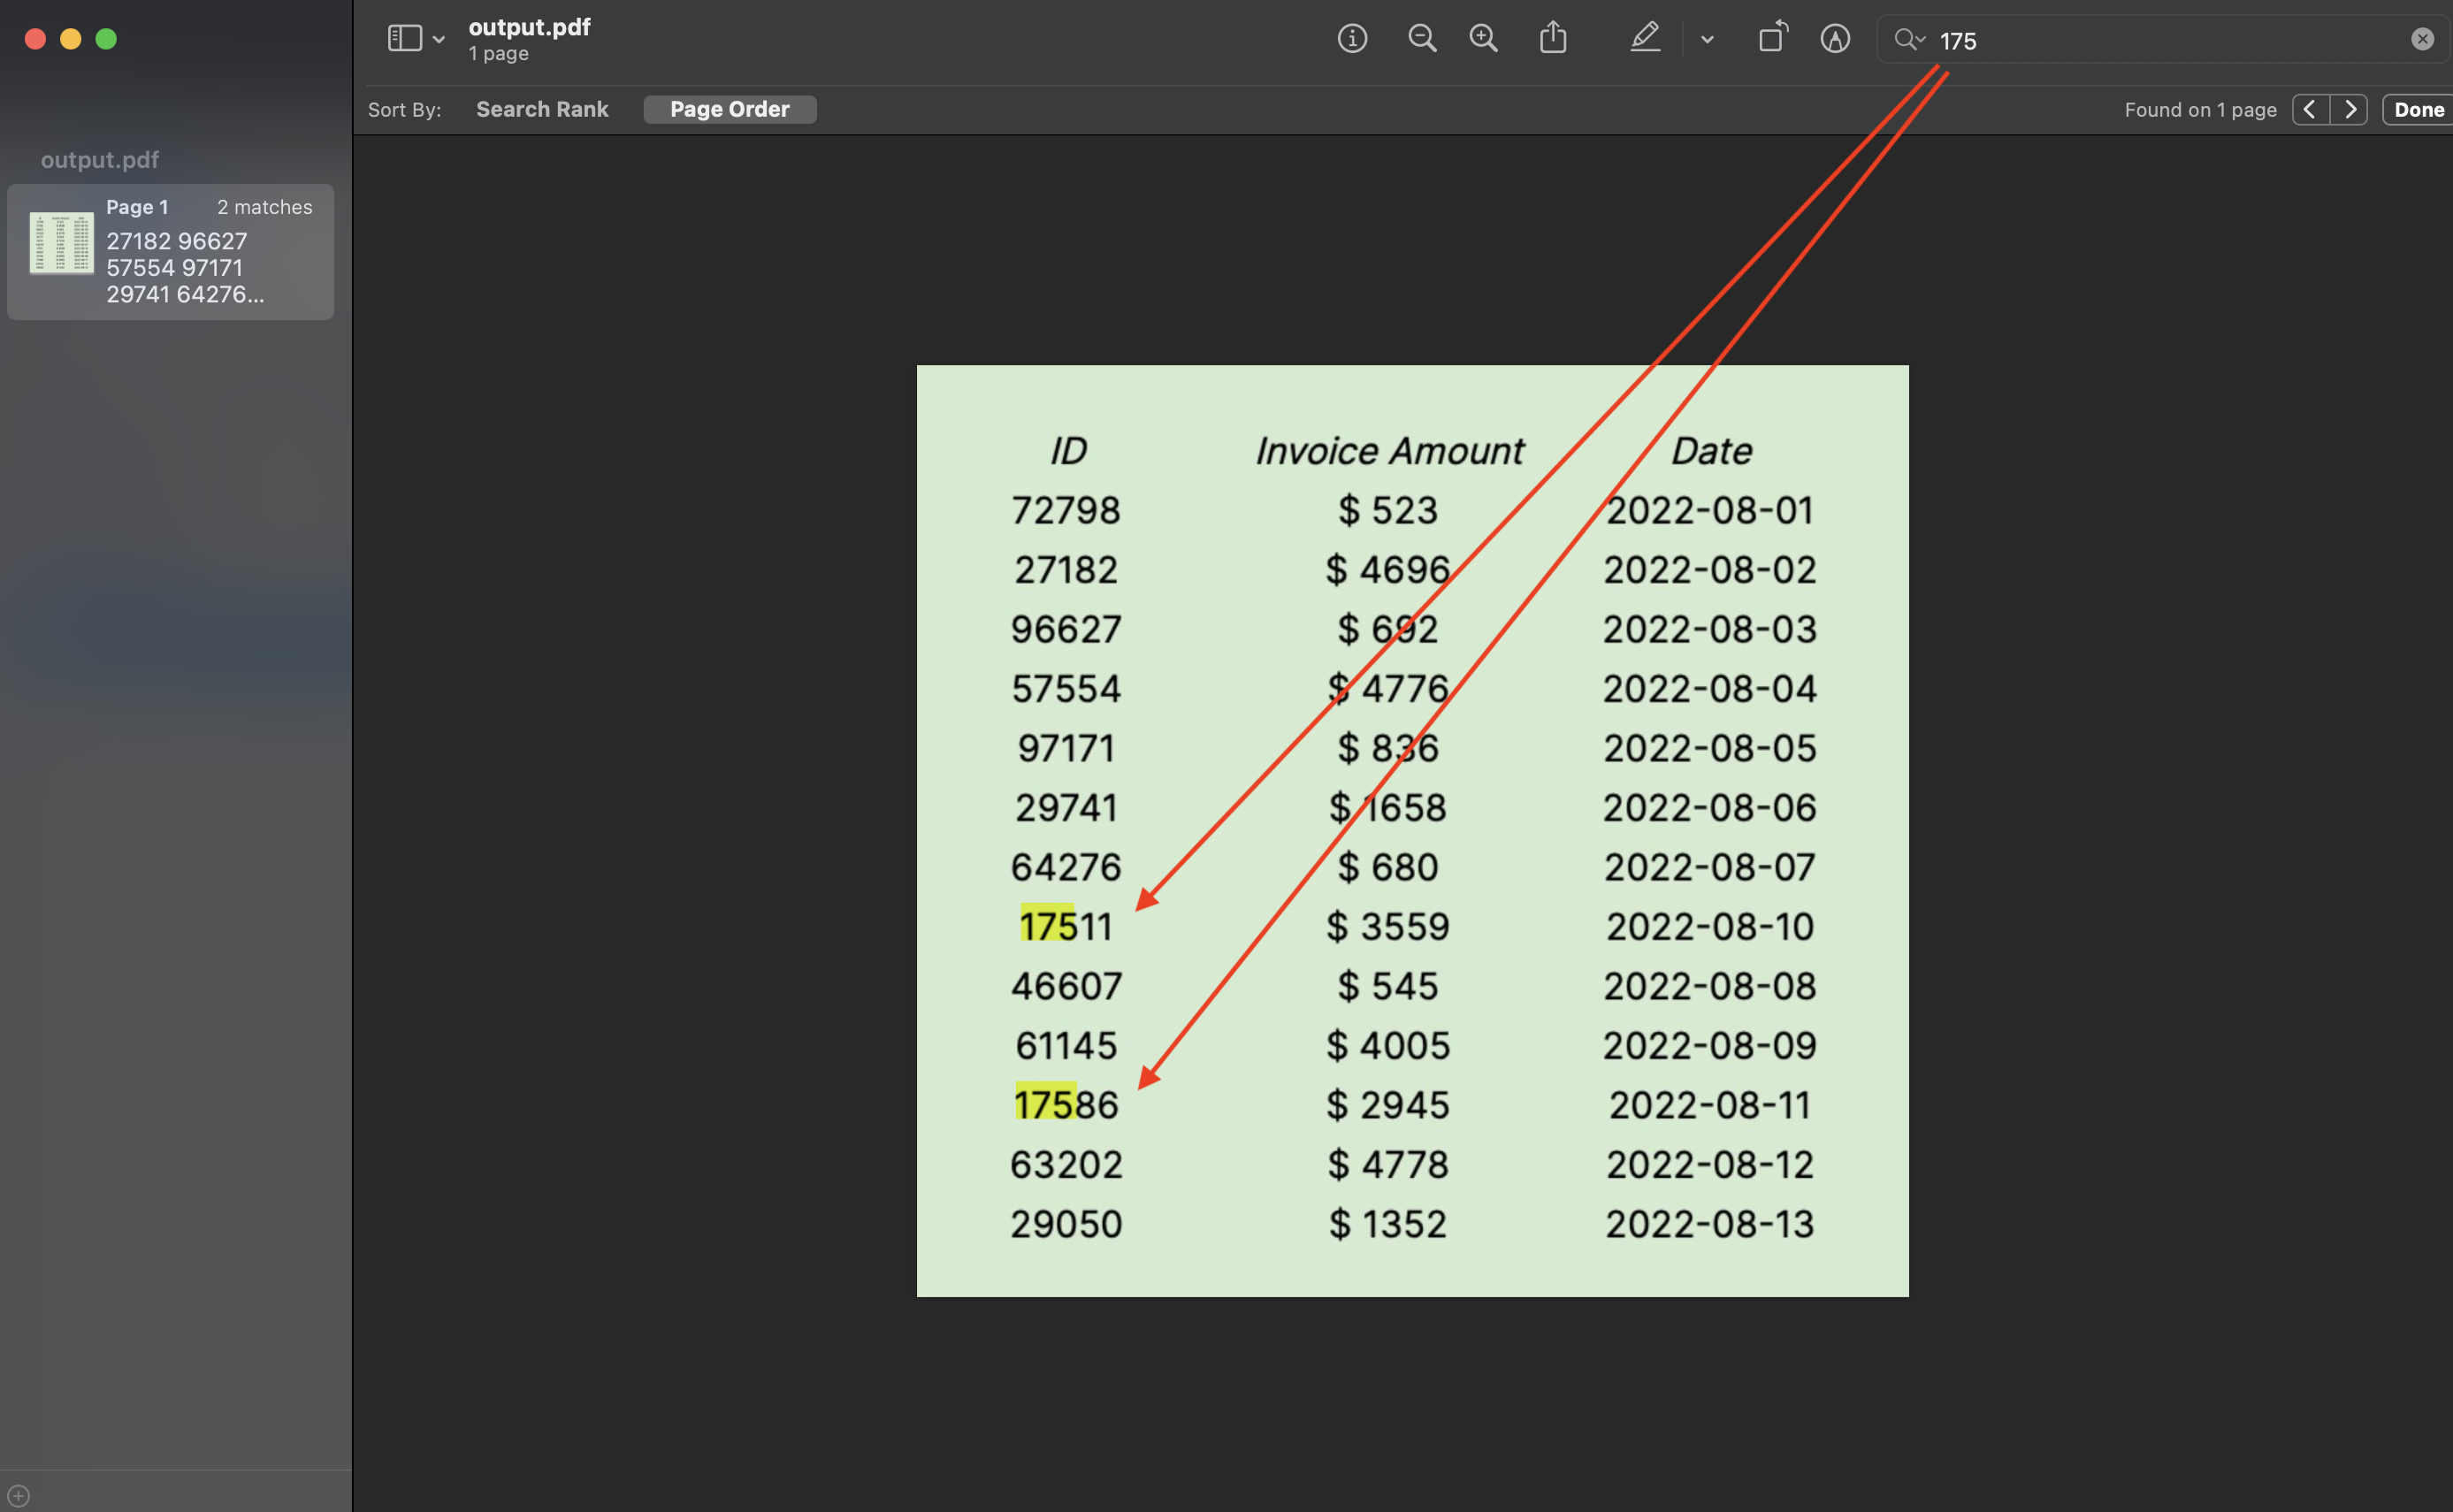

In [ ]:
Image('output_pdf_screenshot.png')

### PDF / Image to Raw OCR Engine Output (Text Only)

In [ ]:
pred_json = model.convert_to_prediction('test.png')

Let's take a look at the output

In [ ]:
pred_json

{'results': [{'filename': 'test.png',
   'page_data': [{'page': 0,
     'size': {},
     'words': [{'text': 'Test',
       'xmin': 361,
       'ymin': 112,
       'xmax': 455,
       'ymax': 146},
      {'text': 'PDF', 'xmin': 478, 'ymin': 112, 'xmax': 563, 'ymax': 146},
      {'text': 'Document', 'xmin': 587, 'ymin': 112, 'xmax': 812, 'ymax': 146},
      {'text': "Let's", 'xmin': 159, 'ymin': 223, 'xmax': 258, 'ymax': 257},
      {'text': 'use', 'xmin': 281, 'ymin': 231, 'xmax': 359, 'ymax': 257},
      {'text': 'the', 'xmin': 381, 'ymin': 223, 'xmax': 452, 'ymax': 257},
      {'text': 'OCR', 'xmin': 476, 'ymin': 222, 'xmax': 571, 'ymax': 257},
      {'text': 'package', 'xmin': 595, 'ymin': 223, 'xmax': 780, 'ymax': 265},
      {'text': 'to', 'xmin': 802, 'ymin': 225, 'xmax': 845, 'ymax': 257},
      {'text': 'read', 'xmin': 870, 'ymin': 223, 'xmax': 964, 'ymax': 257},
      {'text': 'it', 'xmin': 988, 'ymin': 221, 'xmax': 1015, 'ymax': 257},
      {'text': 'Karan', 'xmin': 1164, 'ymi

### Have Advanced Intelligent Document Processing Needs ?

We provide OCR and IDP solutions customised for various use cases - invoice automation, Receipt OCR, purchase order automation, accounts payable automation, ID Card OCR and many more.

- Visit [nanonets.com](https://nanonets.com/?&utm_source=wrapper) for enterprise OCR and IDP solutions.
- Sign up on [app.nanonets.com/#/signup](https://app.nanonets.com/#/signup?&utm_source=wrapper) to start a free trial.